In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

In [3]:
train = pd.DataFrame(pd.read_csv('/home/master/Kaggle/Titanic Dataset/train.csv'))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Questions and Problem Definition

## Problem Definition: 
Who survives? To answer this I will need to find and understand the best predictors for survival. The problem can be broken down into the following questions.

## Questions:
__Which features make good predictors for survival?__<br>
__Which analytic tools are most appropriate given the data?__<br>
__ * Supervised machine learning techniques:
    * Logistic regression
    * Decision trees, random forests

Are any features predictors of other features, that would be relevent to survival?__<br>
__Is Sex a good predictor?__<br>
__Is Age a good predictor?__<br>
__Is Pclass a good predictor?__<br>
__Is a passenger's Fare/Cabin/Embarked location a good predictor?__<br>
__Did those with more family members have a differential survival rate?__<br>
__Is one's title a good predictor?__<br><br>
__What SLM performs best on this data set? Do you know why?__

## Exploratory Data Analysis

In [6]:
train['sname'] = train['Name'].apply(lambda x: x.split(',')[1])

In [7]:
train['Title'] = train['sname'].apply(lambda x: x.split()[0])
train.drop('sname',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr.
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,Mrs.


<big>The following shows pretty clearly that title is not a sensical predictor. However, it does seem to imply that sex may be a good predictor.</big>

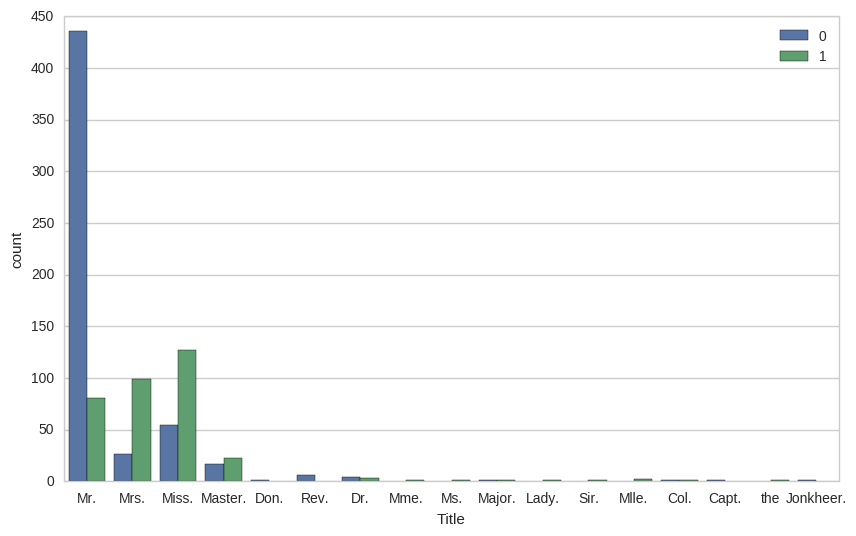

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Title',hue='Survived',data=train)
plt.legend(loc=1)

<big>Indeed, though males outnumbered females almost 2:1, the number of surviving males vs. surviving females is less that 1:2. This implies that sex is a good predictor of survival.</big>

In [9]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
train[train['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

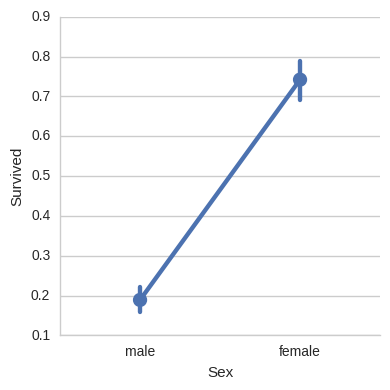

In [11]:
sns.factorplot('Sex','Survived',data=train)

## Pclass versus Survival

<big>The only Pclass that had a survival rate above 50% was first class. Second is close to 50/50, and third class had a survival rate of approximately 1:3.</big>

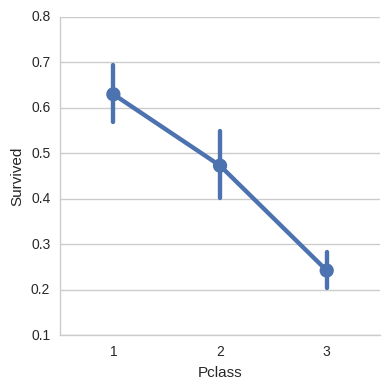

In [12]:
sns.factorplot('Pclass','Survived',data=train)

In [13]:
train['Age'].median()

28.0

In [14]:
data = train
data['Age'].fillna(data['Age'].median(),inplace=True)

## Pclass versus Fare

In [15]:
byclass = data.groupby('Pclass')

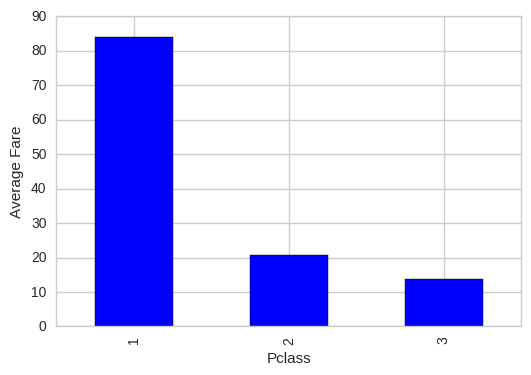

In [16]:
sub = plt.subplot()
sub.set_ylabel('Average Fare')
byclass.mean()['Fare'].plot(kind='bar',ax=sub)

## Age versus Survival

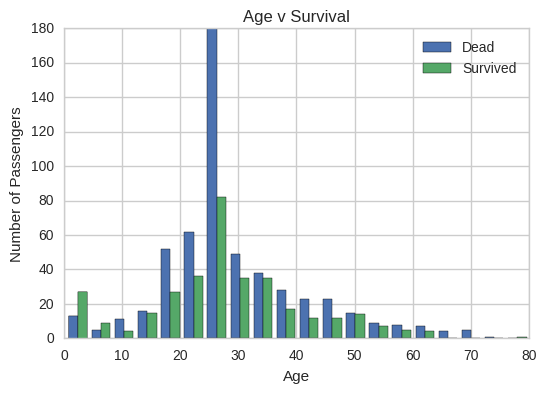

In [17]:
plt.hist([train[train['Survived']==0]['Age'],train[train['Survived']==1]['Age']],label=['Dead','Survived'],bins=20)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age v Survival')

## Fare versus Survival

In [18]:
data['Fare'].count()

891

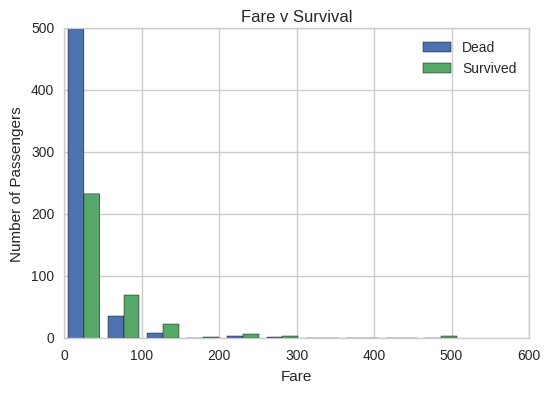

In [19]:
plt.hist([data[data['Survived']==0]['Fare'],data[data['Survived']==1]['Fare']],label=['Dead','Survived'])
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Fare v Survival')

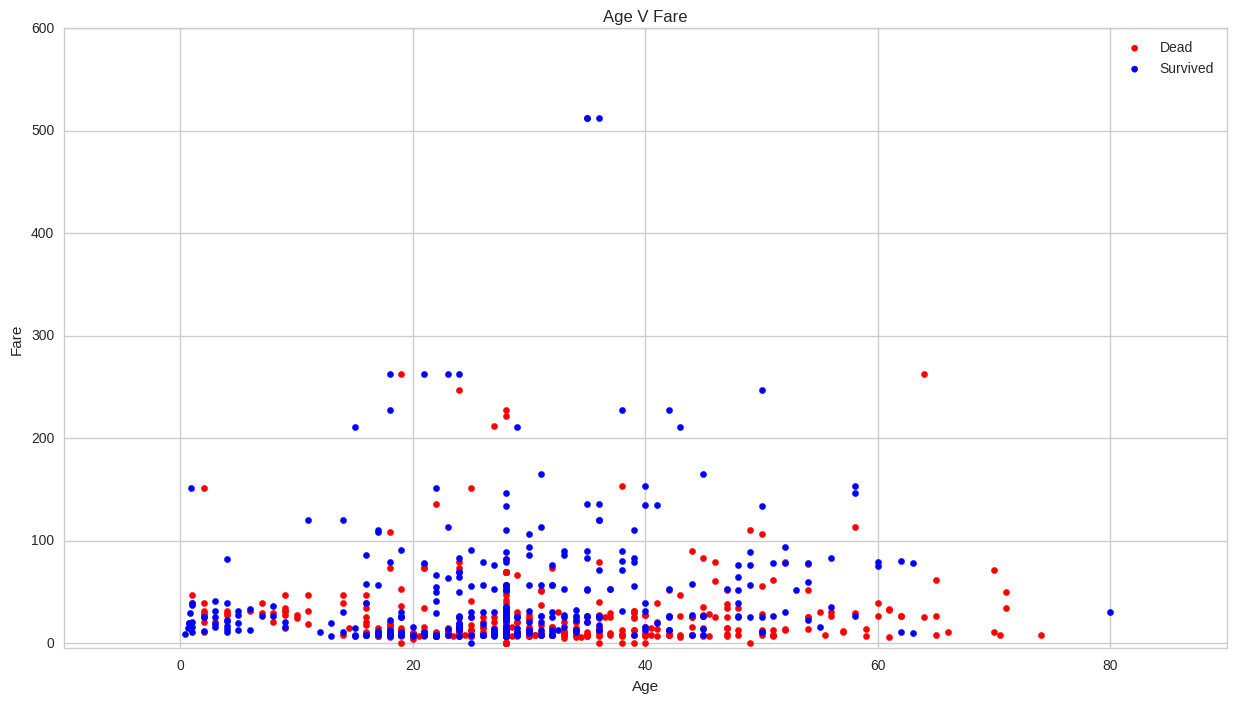

In [20]:
plt.figure(figsize=(15,8))
sub = plt.subplot()
sub.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],color='red')
sub.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],color='blue')
sub.set_xlabel('Age')
sub.set_ylabel('Fare')
sub.set_title('Age V Fare')
sub.set_ylim(-5)
sub.legend(('Dead','Survived'))

* Passengers with fares > 100 were much more likely to survive

## Embarked versus Survival

<big>Interestingly, passengers who embarked from Charbourg were more likely to survive than to die; unlike the passengers from other locations. Presumably, all or most of the crew boarded at Southampton, but crew data is not included in this data set. Is this a primary feature or was a higher class or certain age-group more likely to embark from this location?</big>

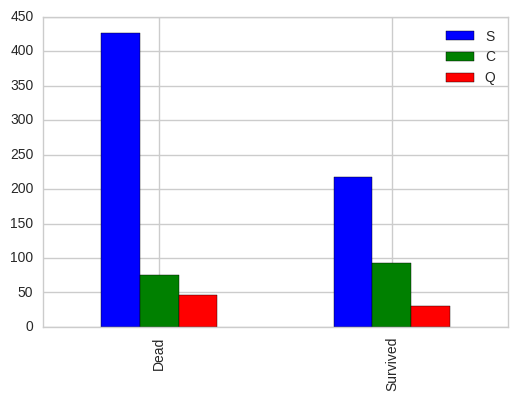

In [21]:
dead_embarked = data[data['Survived']==0]['Embarked'].value_counts()
survived_embarked = data[data['Survived']==1]['Embarked'].value_counts()
embarked = pd.DataFrame([dead_embarked,survived_embarked])
embarked.index = ['Dead','Survived']
embarked.plot(kind='bar')

# Feature Engineering<br>
1. Combine the train and test datasets (so I only have to clean once and train/test will be compatible)
2. Identitfy where I have missing values
3. Fill NaNs with appropriate values

In [22]:
def get_combined_data():
    folder_path = '/home/master/Kaggle/Titanic Dataset/'
    train = pd.read_csv(folder_path + 'train.csv')
    test = pd.read_csv(folder_path + 'test.csv')
    
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    
    combined = train.append(test)
    return combined
combined = get_combined_data()

In [23]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


## Missing Values

<big>Many missing values in the Age and Cabin columns. Looking closely at the dataframe.info(), there is one missing value in the Fare column and two missing values in the Embarked column. So, I need to do some engineering on:<br>
* Age<br>
* Cabin<br>
* Embarked<br>
* Fare</big>

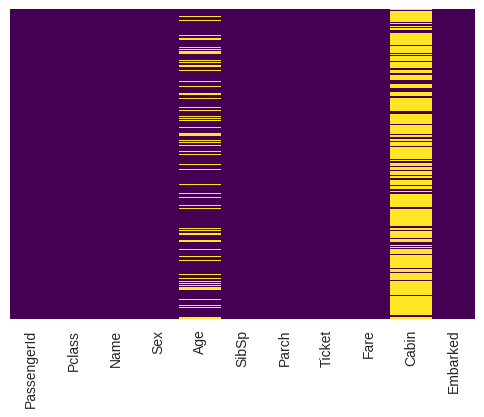

In [26]:
sns.heatmap(combined.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<big>What are some sensible ways to impute values for those missing?<br>
* Cabin: drop column<br>
* Embarked: the median value<br>
* Fare: average<br>
* Age: median, based on Pclass<br></big>

In [27]:
combined.columns

Index([u'PassengerId', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [30]:
combined.drop('Cabin', axis=1, inplace=True)
combined.Embarked.fillna('S',inplace=True)
combined.Fare.fillna(data.Fare.mean(),inplace=True)

In [31]:
median_age = combined.groupby('Pclass')['Age'].transform('median')
combined['Age'].fillna(median_age, inplace=True)

In [32]:
combined.groupby('Pclass')['Age'].median()

Pclass
1    39
2    29
3    24
Name: Age, dtype: float64

In [33]:
combined[combined.index.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


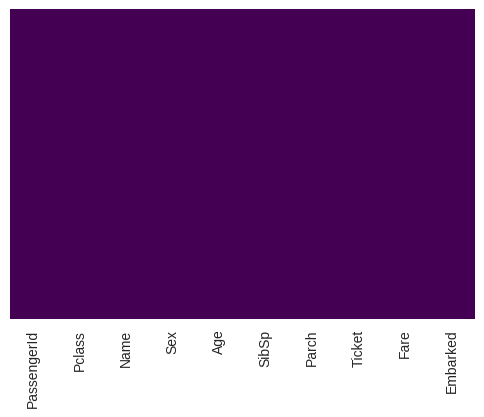

In [34]:
sns.heatmap(combined.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Family Size Feature
Add a feature describing the size of the family

In [35]:
combined['Fam'] = combined['SibSp'] + combined['Parch']

In [36]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fam
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0


## Title Feature
Try combining titles into categories

In [37]:
title_dict = {
                "Capt":       "Officer",
                "Col":        "Officer",
                "Major":      "Officer",
                "Jonkheer":   "Royalty",
                "Don":        "Royalty",
                "Sir" :       "Royalty",
                "Dr":         "Officer",
                "Rev":        "Officer",
                "the Countess":"Royalty",
                "Dona":       "Royalty",
                "Mme":        "Mrs",
                "Mlle":       "Miss",
                "Ms":         "Mrs",
                "Mr" :        "Mr",
                "Mrs" :       "Mrs",
                "Miss" :      "Miss",
                "Master" :    "Master",
                "Lady" :      "Royalty"
                }
def TitleCol(df):
    if 'Title' not in df.columns:
        df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
        df['Title'] = df.Title.map(title_dict)
        df.drop('Name',1,inplace=True)

In [38]:
TitleCol(combined)

In [39]:
title_dummies = pd.get_dummies(combined['Title'],prefix='Title')
combined.drop('Title',1,inplace=True)
combined = pd.concat([combined,title_dummies],axis=1)

In [40]:
data['Title'] = data['Name'].map(lambda name: name.split(',')[1].split('.')[0])
data['Title'] = data.Title.map(title_dict)
data = pd.concat([data,pd.get_dummies(data['Title'])],axis=1)

In [41]:
TitleCol(train)

In [42]:
train_titles = pd.get_dummies(train['Title'],prefix='Title')
train.drop('Title',1,inplace=True)
train = pd.concat([train,train_titles],axis=1)

In [43]:
train.drop(['Cabin','sname','Ticket'],axis=1,inplace=True)

In [44]:
sexdum = pd.get_dummies(train['Sex'])
train.drop('Sex',axis=1,inplace=True)
train = pd.concat([train,sexdum],axis=1)

In [45]:
train.drop('male',axis=1,inplace=True)

In [46]:
embdum = pd.get_dummies(train['Embarked'])
train.drop('Embarked',axis=1,inplace=True)
train = pd.concat([train,embdum],axis=1)

In [47]:
train.drop('C',axis=1,inplace=True)

In [109]:
train.drop('Name',1,inplace=True)

ValueError: labels ['Name'] not contained in axis

In [110]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,Q,S
0,1,0,3,22,1,0,7.2500,0,0,1
1,2,1,1,38,1,0,71.2833,1,0,0
2,3,1,3,26,0,0,7.9250,1,0,1
3,4,1,1,35,1,0,53.1000,1,0,1
4,5,0,3,35,0,0,8.0500,0,0,1


In [75]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fam,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,0
1,2,1,female,38,1,0,PC 17599,71.2833,C,1,0,0,0,1,0,0
2,3,3,female,26,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,0,0
3,4,1,female,35,1,0,113803,53.1000,S,1,0,0,0,1,0,0
4,5,3,male,35,0,0,373450,8.0500,S,0,0,0,1,0,0,0


In [104]:
noPclass = train.drop('Pclass',axis=1)
# noTitle = train.drop(['Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Officer','Title_Royalty'],axis=1)
noFare = train.drop('Fare',1)


In [68]:
trainFam = train.drop(['SibSp','Parch'],1)
trainFam['Fam'] = train['SibSp'] + train['Parch']

In [69]:
trainFam.head()

,PassengerId,Survived,Pclass,Name,Age,Fare,female,Q,S,Fam
0,1,0,3,"Braund, Mr. Owen Harris",22,7.2500,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,71.2833,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26,7.9250,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,53.1000,1,0,1,1
4,5,0,3,"Allen, Mr. William Henry",35,8.0500,0,0,1,0


In [70]:
noPclass

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fam,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,0
1,2,female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,0,0
3,4,female,35.0,1,0,113803,53.1000,S,1,0,0,0,1,0,0
4,5,male,35.0,0,0,373450,8.0500,S,0,0,0,1,0,0,0
5,6,male,24.0,0,0,330877,8.4583,Q,0,0,0,1,0,0,0
6,7,male,54.0,0,0,17463,51.8625,S,0,0,0,1,0,0,0
7,8,male,2.0,3,1,349909,21.0750,S,4,1,0,0,0,0,0
8,9,female,27.0,0,2,347742,11.1333,S,2,0,0,0,1,0,0
9,10,female,14.0,1,0,237736,30.0708,C,1,0,0,0,1,0,0


## Linear Regression will give me a distribution of predictions b/t 0 and 1, rather than classifiers of 0 or 1. 

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [80]:
lr = LogisticRegression()

In [84]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

In [85]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
predictions = lr.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix

In [88]:
y_test.dtype

dtype('int64')

In [89]:
type(y_test)

pandas.core.series.Series

In [90]:
predictions.dtype

dtype('int64')

In [91]:
type(predictions)

numpy.ndarray

In [92]:
# y = y_test.view(dtype='float64')
# y_test = y[:]

In [ ]:
# y_test.dtype

In [93]:
target_names = ['Dead', 'Survived']

In [96]:
print classification_report(y_test,predictions, target_names=target_names)

             precision    recall  f1-score   support

       Dead       0.79      0.87      0.83       173
   Survived       0.79      0.68      0.73       122

avg / total       0.79      0.79      0.79       295



__This means of all guesses for Dead, 84% were correct, and of all Dead passengers, 89% were predicted. <br>
Harmonic mean: f1-score = precision * recall / (precision + recall) <br>
Support: total Dead, Survived passengers to be predicted.__

In [97]:
print confusion_matrix(y_test,predictions)

[[151  22]
 [ 39  83]]


In [98]:
print predictions

[0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1
 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1]


__Let's try without Pclass, or without Title, to see if collinearity is playing a role...__

In [105]:
X_noPclass = noPclass.drop('Survived',1)
y_noPclass = noPclass['Survived']

X_noPclass_train, X_noPclass_test, y_noPclass_train, y_noPclass_test = train_test_split(
    X_noPclass,y_noPclass,test_size=0.33)

lr.fit(X_noPclass_train,y_noPclass_train)

noPclass_preds = lr.predict(X_noPclass_test)

print classification_report(y_noPclass_test,noPclass_preds,target_names=target_names)

             precision    recall  f1-score   support

       Dead       0.84      0.90      0.87       184
   Survived       0.81      0.72      0.76       111

avg / total       0.83      0.83      0.83       295



In [106]:
print confusion_matrix(y_noPclass_test,noPclass_preds)

[[165  19]
 [ 31  80]]


In [107]:
X_noTitle = noTitle.drop('Survived',1)
y_noTitle = noTitle['Survived']

X_noTitle_train,X_noTitle_test,y_noTitle_train,y_noTitle_test = train_test_split(
    X_noTitle,y_noTitle,test_size=0.33)

ValueError: labels ['Survived'] not contained in axis

In [108]:
lr.fit(X_noTitle_train,y_noTitle_train)

NameError: name 'X_noTitle_train' is not defined

In [ ]:
noTitle_pred = lr.predict(X_noTitle_test)

In [ ]:
print classification_report(y_noTitle_test,noTitle_pred,target_names=['Dead','Survived'])

In [111]:
X_noFare = noFare.drop('Survived',1)
y_noFare = noFare['Survived']

X_noFare_train,X_noFare_test,y_noFare_train,y_noFare_test = train_test_split(
    X_noFare,y_noFare,test_size=0.33)

In [112]:
lr.fit(X_noFare_train,y_noFare_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
noFare_pred = lr.predict(X_noFare_test)

In [114]:
print classification_report(y_noFare_test,noFare_pred,target_names=target_names)

             precision    recall  f1-score   support

       Dead       0.81      0.88      0.84       173
   Survived       0.81      0.70      0.75       122

avg / total       0.81      0.81      0.80       295



In [115]:
X_trainFam = noTitle.drop('Survived',1)
y_trainFam = noTitle['Survived']

X_trainFam_train,X_trainFam_test,y_trainFam_train,y_trainFam_test = train_test_split(
    X_trainFam,y_trainFam,test_size=0.33)

ValueError: labels ['Survived'] not contained in axis

In [116]:
lr.fit(X_trainFam_train,y_trainFam_train)

NameError: name 'X_trainFam_train' is not defined

In [117]:
trainFam_pred = lr.predict(X_trainFam_test)

NameError: name 'X_trainFam_test' is not defined

In [118]:
print classification_report(y_trainFam_test,trainFam_pred)

NameError: name 'y_trainFam_test' is not defined

## Decision Tree ##

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dtree = DecisionTreeClassifier()

In [121]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [122]:
dpredict = dtree.predict(X_test)

In [123]:
print 'Classification Report:\n',classification_report(y_test, dpredict, target_names=target_names)
print '\n Confusion Matrix:\n',confusion_matrix(y_test,dpredict)

Classification Report:
             precision    recall  f1-score   support

       Dead       0.76      0.80      0.78       173
   Survived       0.70      0.64      0.67       122

avg / total       0.73      0.74      0.73       295


 Confusion Matrix:
[[139  34]
 [ 44  78]]


## Random Forest ##

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rfc = RandomForestClassifier(n_estimators=200)
rfc20 = RandomForestClassifier(n_estimators=20)
rfc2k = RandomForestClassifier(n_estimators=2000)


In [126]:
rfc.fit(X_train,y_train)
rfc20.fit(X_train,y_train)
rfc2k.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [127]:
rfcpred = rfc.predict(X_test)
rfc20pred = rfc20.predict(X_test)
rfc2kpred = rfc2k.predict(X_test)

In [128]:
print 'Classification Report:\n',classification_report(y_test,rfcpred,target_names=target_names)
print '\n Confusion Matrix:\n',confusion_matrix(y_test,rfcpred)

print 'Classification Report:\n',classification_report(y_test,rfc20pred,target_names=target_names)
print '\n Confusion Matrix:\n',confusion_matrix(y_test,rfc20pred)

print 'Classification Report:\n',classification_report(y_test,rfc2kpred,target_names=target_names)
print '\n Confusion Matrix:\n',confusion_matrix(y_test,rfc2kpred)

Classification Report:
             precision    recall  f1-score   support

       Dead       0.83      0.88      0.85       173
   Survived       0.81      0.75      0.78       122

avg / total       0.82      0.82      0.82       295


 Confusion Matrix:
[[152  21]
 [ 31  91]]
Classification Report:
             precision    recall  f1-score   support

       Dead       0.80      0.87      0.83       173
   Survived       0.79      0.70      0.74       122

avg / total       0.80      0.80      0.79       295


 Confusion Matrix:
[[150  23]
 [ 37  85]]
Classification Report:
             precision    recall  f1-score   support

       Dead       0.83      0.87      0.85       173
   Survived       0.80      0.75      0.78       122

avg / total       0.82      0.82      0.82       295


 Confusion Matrix:
[[150  23]
 [ 30  92]]
